In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import pylab

In [2]:
df = pd.read_csv("USA_Housing.csv")

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.shape

(5000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
df.drop(['Address','Avg. Area Number of Bedrooms'], axis = 1, inplace = True)

# Feature Scaling

In [10]:
df1 = df
scal = MinMaxScaler()
df2 = df1.drop('Price', axis = 1)
df3 = scal.fit_transform(df2)
df = pd.DataFrame(df3, columns = df2.columns)
df['Price']= df1['Price']
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.329942,1.059034e+06
1,0.683521,0.488538,0.464501,0.575968,1.505891e+06
2,0.483737,0.468609,0.701350,0.528582,1.058988e+06
3,0.506630,0.660956,0.312430,0.491549,1.260617e+06
4,0.469223,0.348556,0.611851,0.376988,6.309435e+05


In [11]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,0.564890,0.484803,0.498658,0.518234,1.232073e+06
std,0.118547,0.144216,0.133694,0.142920,3.531176e+05
min,0.000000,0.000000,0.000000,0.000000,1.593866e+04
25%,0.485889,0.389536,0.407138,0.420903,9.975771e+05
50%,0.567350,0.483815,0.500666,0.518751,1.232669e+06
75%,0.644977,0.582783,0.588787,0.614676,1.471210e+06
max,1.000000,1.000000,1.000000,1.000000,2.469066e+06


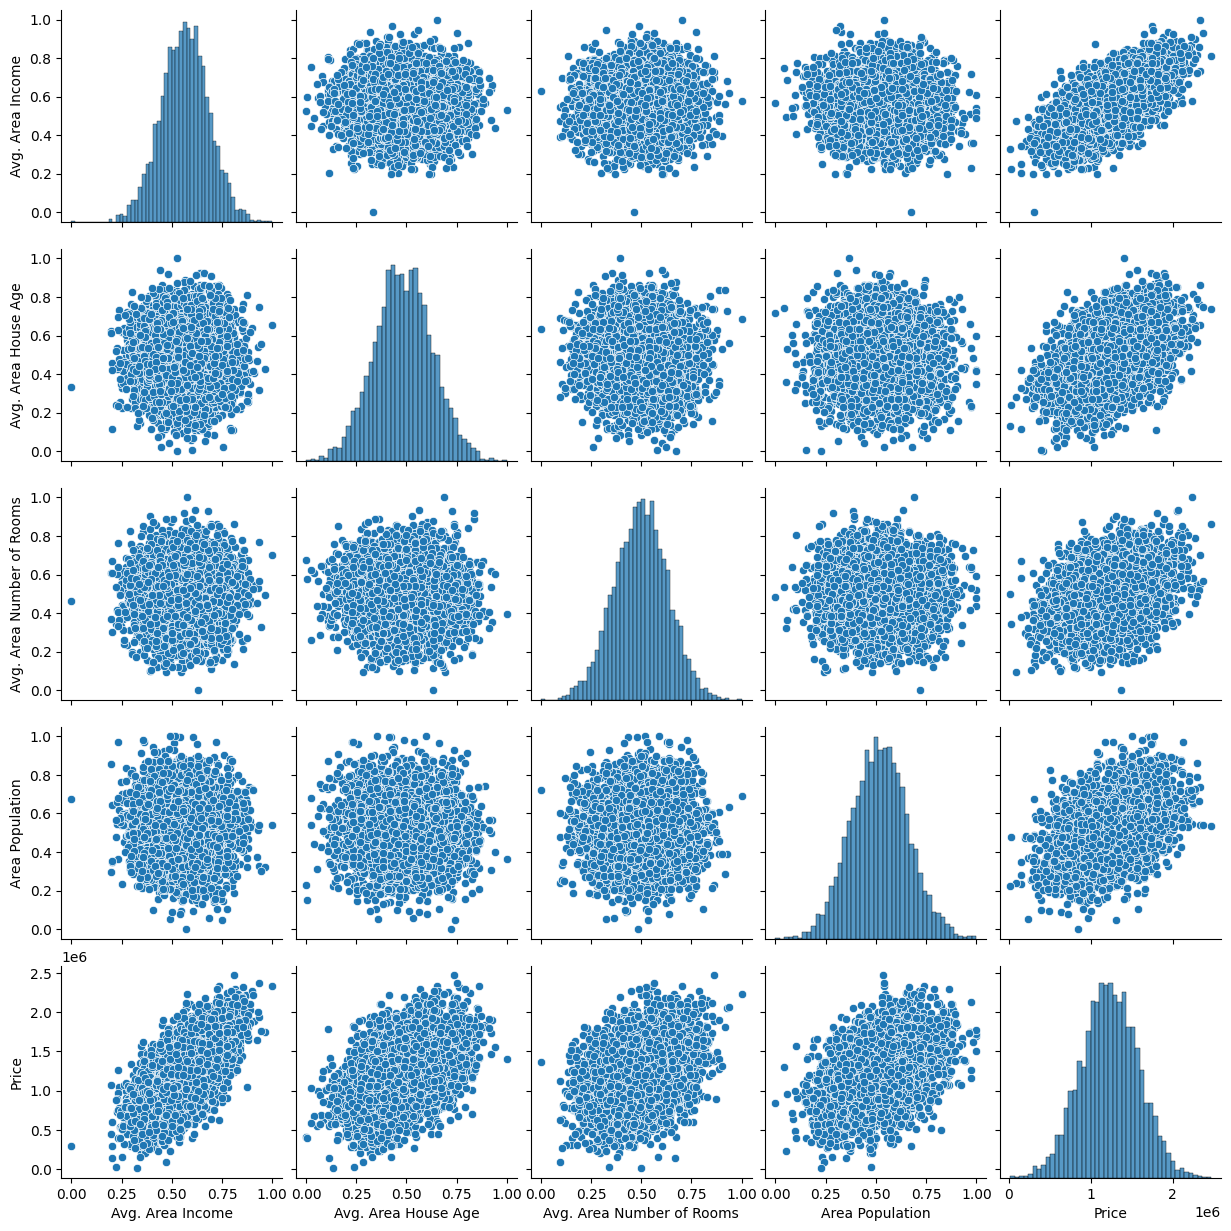

In [12]:
sns.pairplot(df)
plt.show()

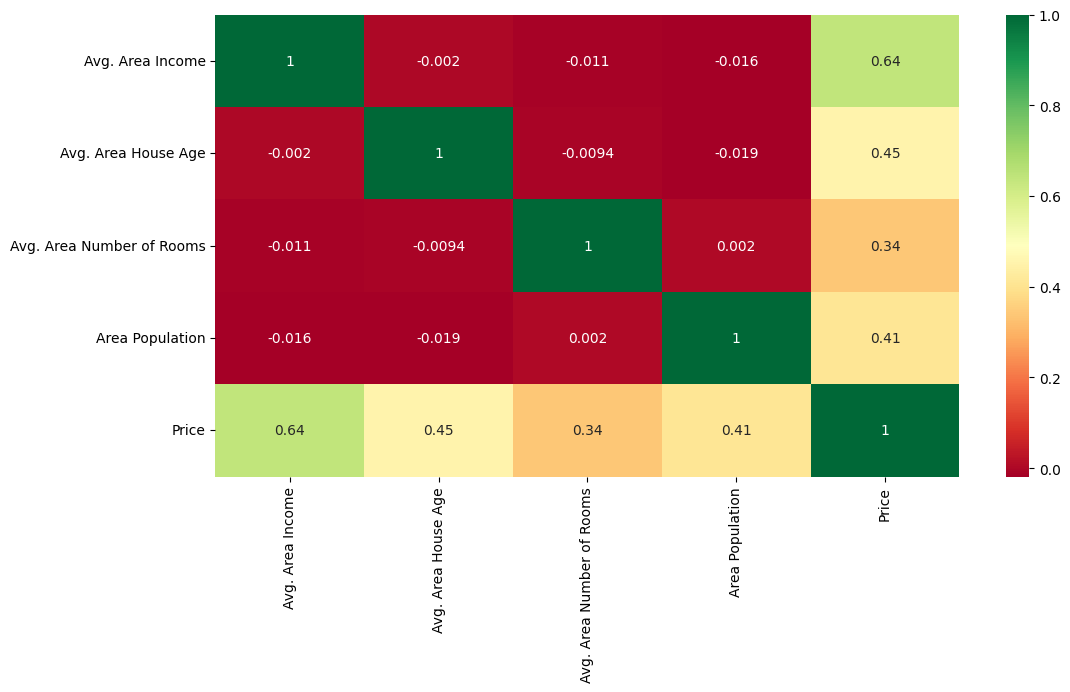

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

# Checking for Gaussion Distribution:

In [14]:
def plot_data(df):
    num_columns = len(df.columns)
    fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(10, 4 * num_columns))
    
    for i, column in enumerate(df.columns):
        # Histogram
        sns.histplot(df[column], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Histogram for {column}')
        
        # Probability plot
        stats.probplot(df[column], dist='norm', plot=axes[i, 1])
        axes[i, 1].set_title(f'Probability Plot for {column}')
    
    plt.tight_layout()
    plt.show()

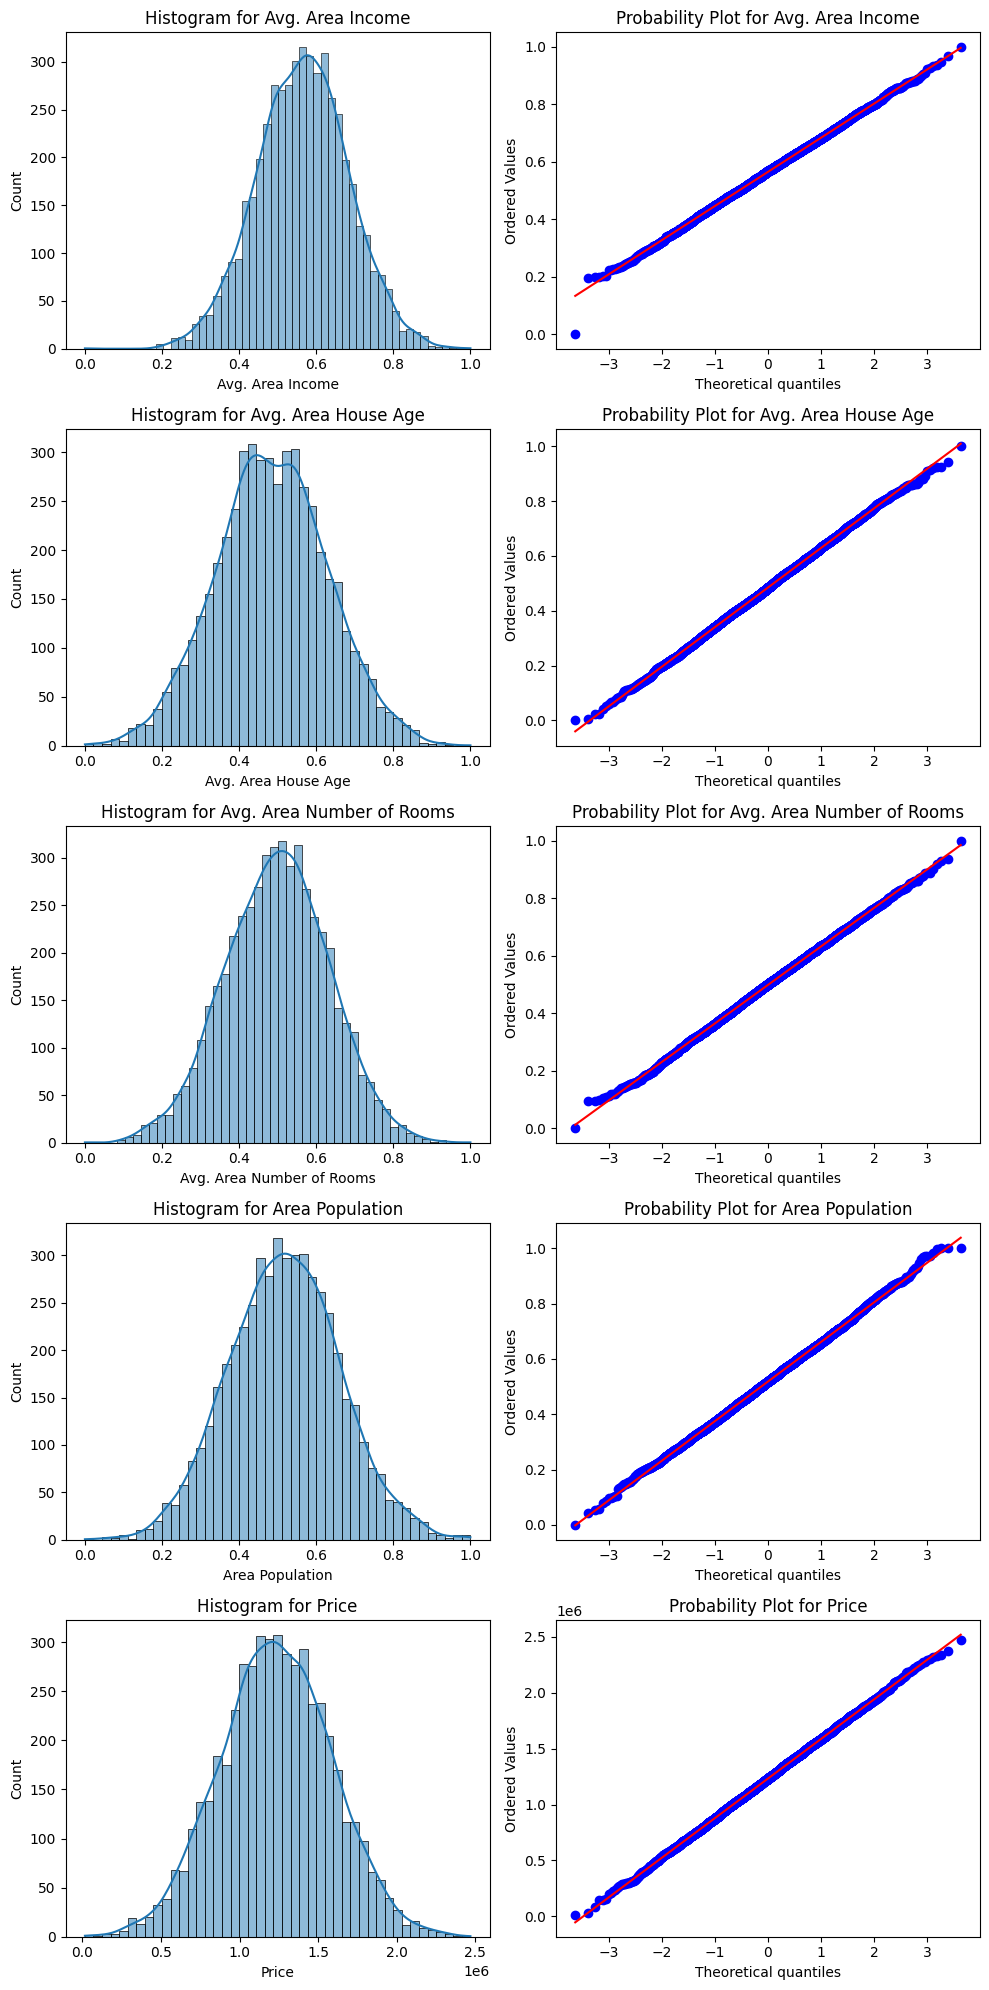

In [15]:
plot_data(df)

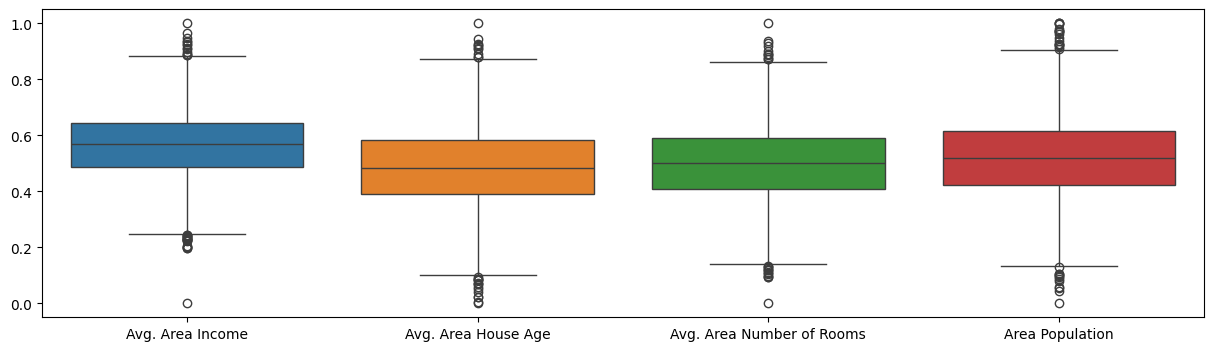

In [16]:
plt.figure(figsize=(15,4))
sns.boxplot( df.drop('Price', axis = 1))
plt.show()

# Split the data

In [17]:
x = df.drop('Price', axis = 1)
y = df['Price']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3500, 4), (3500,), (1500, 4), (1500,))

# Import Model and train it:-

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
model.score(x_train,y_train)

0.9192473429726608

In [23]:
model.score(x_test, y_test)

0.9147354890984772

In [24]:
y_pred = model.predict(x_test)

# Performance Matrics:

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
MSE  = mean_squared_error((y_test),(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 10062092569.298998
RMSE : 100309.98240105019
R2 : 0.9147354890984772
Adjusted R2 :  0.9145073566278377


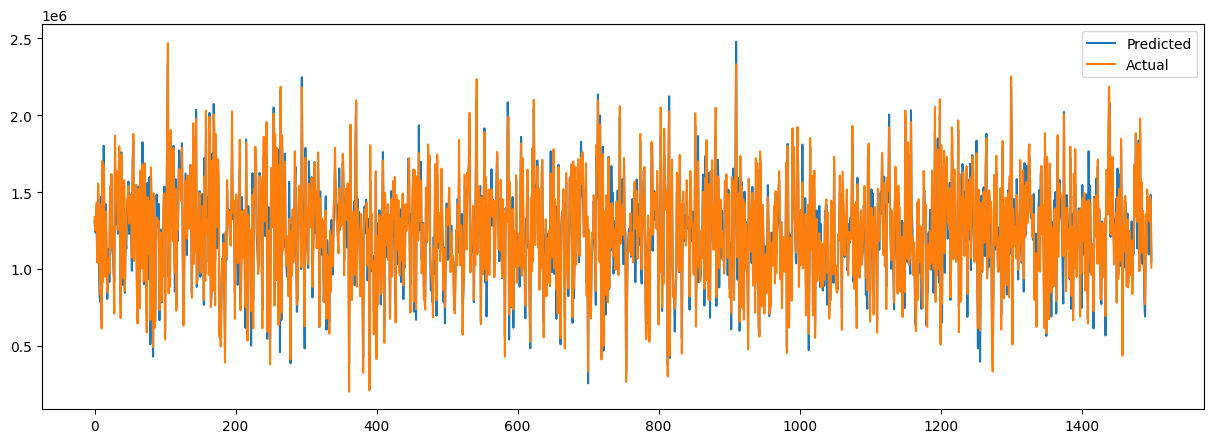

In [27]:
plt.figure(figsize=(15,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

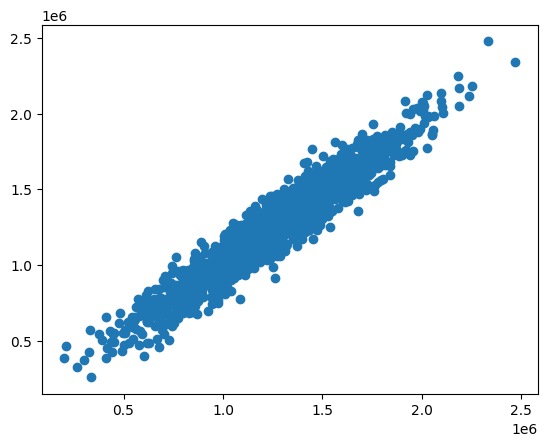

In [28]:
plt.scatter(y_test,y_pred)

C:\Users\user\AppData\Local\Temp\ipykernel_10492\2934913456.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred))


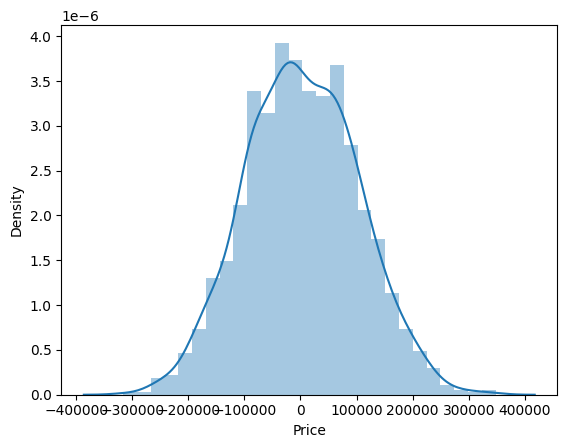

In [29]:
sns.distplot((y_test-y_pred))
plt.show()

In [30]:
model.coef_

array([1945024.6827082 , 1138610.55166755,  911550.33016876,
       1056571.78667579])

In [31]:
cdf = pd.DataFrame(model.coef_,x_train.columns,columns = ['Coef'])
cdf

,Coef
Avg. Area Income,1.945025e+06
Avg. Area House Age,1.138611e+06
Avg. Area Number of Rooms,9.115503e+05
Area Population,1.056572e+06


# Hyperparameter Tuning:-

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
r_model = Ridge()
param = {'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.000001,1,1.1,1.2],
         'max_iter': [500,1000,1500,2000]}
r_grid = GridSearchCV(r_model, param, scoring='neg_mean_squared_error', cv=5)
r_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1,
                                   1.1, 1.2],
                         'max_iter': [500, 1000, 1500, 2000]},
             scoring='neg_mean_squared_error')

In [33]:
r_grid.best_params_

{'alpha': 0.01, 'max_iter': 500}

In [34]:
r_grid.best_score_

-10323122458.272095

In [35]:
r_y_pred = r_grid.predict(x_test)

In [36]:
MSE  = mean_squared_error((y_test),(r_y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(r_y_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (r_y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 10061967483.40692
RMSE : 100309.35890238218
R2 : 0.9147365490556716
Adjusted R2 :  0.9145084194210379


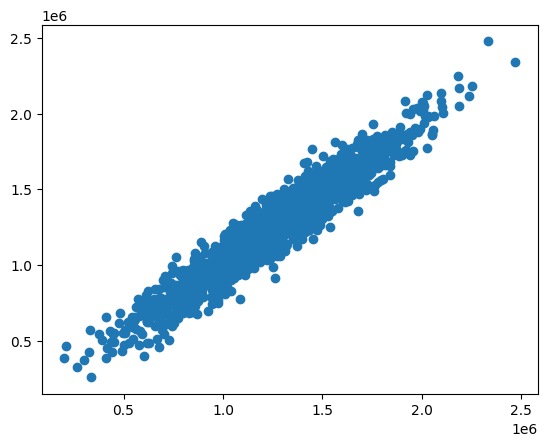

In [37]:
plt.scatter(y_test,r_y_pred)

# Lasso Regression:-

In [38]:
from sklearn.linear_model import Lasso
l_model = Lasso()
param = {'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.000001,1,1.1,1.2,1.3],
        'max_iter': [500,1000,1500,2000]}
l_grid = GridSearchCV(l_model, param, scoring='neg_mean_squared_error', cv=5)
l_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1,
                                   1.1, 1.2, 1.3],
                         'max_iter': [500, 1000, 1500, 2000]},
             scoring='neg_mean_squared_error')

In [39]:
l_grid.best_params_

{'alpha': 1.3, 'max_iter': 500}

In [40]:
l_grid.best_score_

-10323130725.051435

In [41]:
l_y_pred = l_grid.predict(x_test)

In [42]:
MSE  = mean_squared_error((y_test),(l_y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(l_y_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (l_y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 10062074752.539762
RMSE : 100309.89359250544
R2 : 0.9147356400747529
Adjusted R2 :  0.9145075080080634


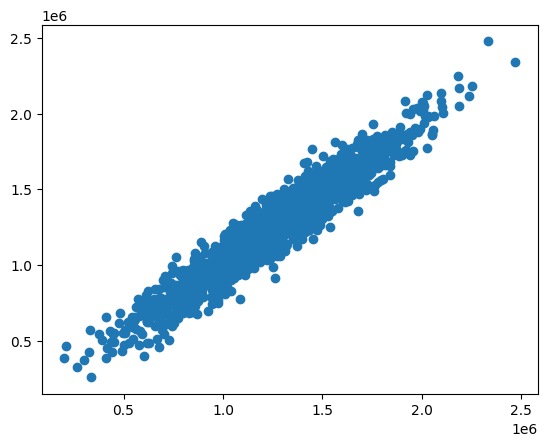

In [43]:
plt.scatter(y_test,l_y_pred)

# Elasticnet regression:-

In [44]:
from sklearn.linear_model import ElasticNet
el_model = ElasticNet()
param = {'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.000001,1,1.1,1.2],
         'l1_ratio':[0.01,0.001,0.0001,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,1],
             'max_iter': [500,1000,1500,2000]}
el_grid = GridSearchCV(el_model, param, scoring='neg_mean_squared_error', cv=5)
el_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1,
                                   1.1, 1.2],
                         'l1_ratio': [0.01, 0.001, 0.0001, 0.02, 0.03, 0.04,
                                      0.05, 0.06, 0.07, 0.08, 0.09, 1],
                         'max_iter': [500, 1000, 1500, 2000]},
             scoring='neg_mean_squared_error')

In [45]:
el_grid.score(x_test, y_test)

-10061717102.367811

In [46]:
el_y_pred = el_grid.predict(x_test)

In [47]:
MSE  = mean_squared_error((y_test),(el_y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(el_y_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (el_y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 10061717102.367811
RMSE : 100308.11085035851
R2 : 0.9147386707432521
Adjusted R2 :  0.9145105467853745


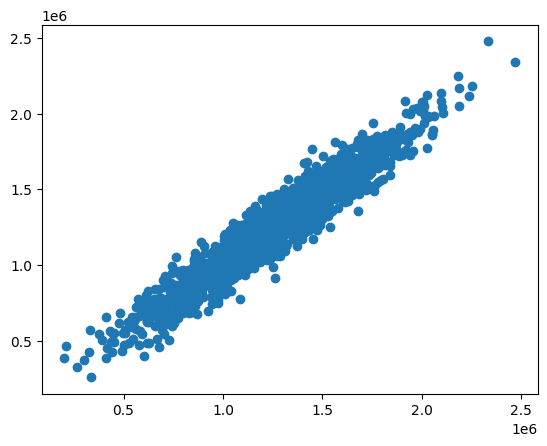

In [48]:
plt.scatter(y_test,el_y_pred)

# With Decision Tree Regressor:-

In [49]:
from sklearn.tree import DecisionTreeRegressor
mtree = DecisionTreeRegressor()
mtree.fit(x_train,y_train)
y_t_pred = mtree.predict(x_test)

In [50]:
mtree.score(x_train,y_train)

1.0

In [51]:
mtree.score(x_test,y_test)

0.7471982937366801

# Tunning With DicisionTree:-

In [52]:
param1 = { 'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
            'splitter' : ["best", "random"],
           'max_depth':[6,7,8,9,10,12,14,16],
           'ccp_alpha':[1,1.5,2,2.5,3,3.5],
            'max_features':[4,5,6,8]}
d_grid = GridSearchCV(mtree, param1, scoring='neg_mean_squared_error', cv=5)
d_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [1, 1.5, 2, 2.5, 3, 3.5],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [6, 7, 8, 9, 10, 12, 14, 16],
                         'max_features': [4, 5, 6, 8],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [53]:
d_grid.score(x_train,y_train)

-7115765311.559763

In [54]:
d_pred = d_grid.predict(x_test)

In [55]:
MSE  = mean_squared_error((y_test),(d_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(d_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (d_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 26436014720.93747
RMSE : 162591.5579633133
R2 : 0.7759855765744338
Adjusted R2 :  0.7753862068796497


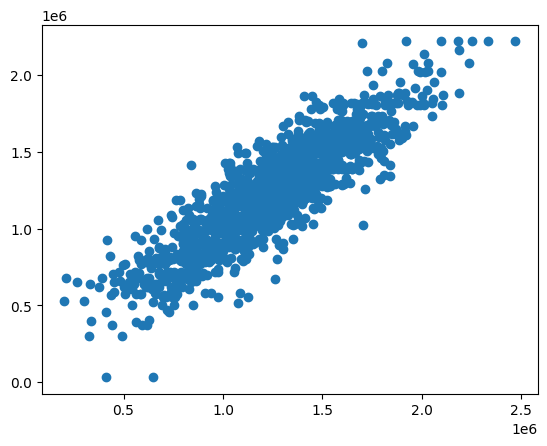

In [56]:
plt.scatter(y_test,d_pred)

# With Random Forest:-

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rmodel = RandomForestRegressor(n_estimators = 500, criterion = "squared_error",max_features = 4,max_samples =3500,max_depth = 16, random_state=  51)
rmodel.fit(x_train,y_train)

RandomForestRegressor(max_depth=16, max_features=4, max_samples=3500,
                      n_estimators=500, random_state=51)

In [104]:
rmodel.score(x_train,y_train)

0.9842174339915107

In [105]:
r_pred = rmodel.predict(x_test)

In [106]:
rmodel.score(x_test,y_test)

0.8831551778235063

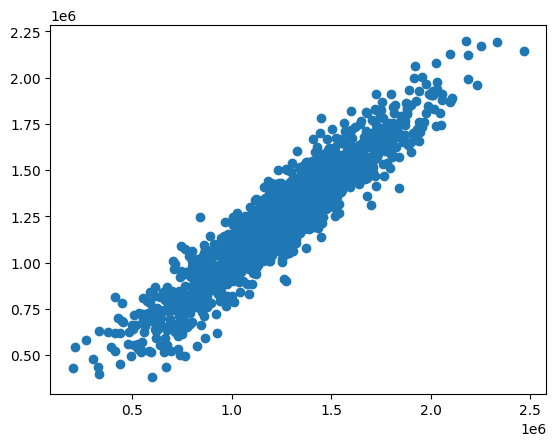

In [107]:
plt.scatter(y_test,r_pred)

# Tunning with RandomForest:

In [63]:
rmodel = RandomForestRegressor()
parameter = { 'n_estimators':[200,300,400],
              'max_depth':[6,7,8,9,10,12,14,16],
              'max_features':[4,5,6,8]}
r_grid = GridSearchCV(rmodel, parameter, scoring='neg_mean_squared_error', cv=5)
r_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 12, 14, 16],
                         'max_features': [4, 5, 6, 8],
                         'n_estimators': [200, 300, 400]},
             scoring='neg_mean_squared_error')

In [64]:
r_grid.best_params_

{'max_depth': 14, 'max_features': 6, 'n_estimators': 200}

In [65]:
r_grid.score(x_train,y_train)

-2173693319.4602103

In [66]:
rf_pred = r_grid.predict(x_test)

In [67]:
MSE  = mean_squared_error((y_test),(rf_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(rf_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (rf_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 13877129466.202282
RMSE : 117801.22862772817
R2 : 0.8824074964025819
Adjusted R2 :  0.8820928676304148


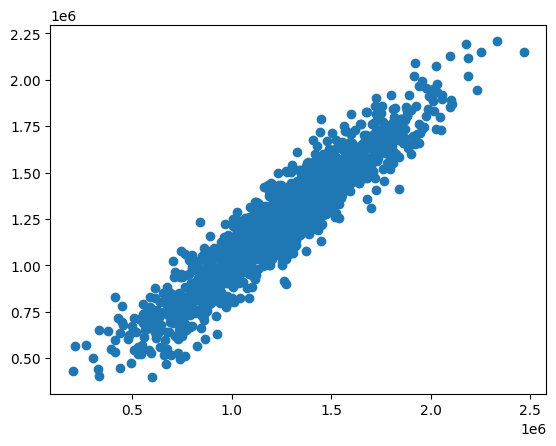

In [68]:
plt.scatter(y_test,rf_pred)

# With SVM Regression:-

In [69]:
from sklearn.svm import SVR
smodel = SVR()
smodel.fit(x_train,y_train)

SVR()

In [70]:
smodel.score(x_train,y_train)

0.0009848656856066285

# Tunning with SVM:

In [71]:
smodel = SVR()
param = {'kernel':['linear','poly'], 'degree': [2,3,4,5]}
s_grid = GridSearchCV(smodel, param, scoring='neg_mean_squared_error', cv=5)
s_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'degree': [2, 3, 4, 5], 'kernel': ['linear', 'poly']},
             scoring='neg_mean_squared_error')

In [72]:
s_grid.best_params_

{'degree': 3, 'kernel': 'poly'}

In [73]:
s_grid.score(x_train,y_train)

-15803850761.591146

In [74]:
s_pred = s_grid.predict(x_test)

In [75]:
MSE  = mean_squared_error((y_test),(s_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(s_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (s_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 14652953481.999884
RMSE : 121049.38447592323
R2 : 0.8758332918027879
Adjusted R2 :  0.8755010731855378


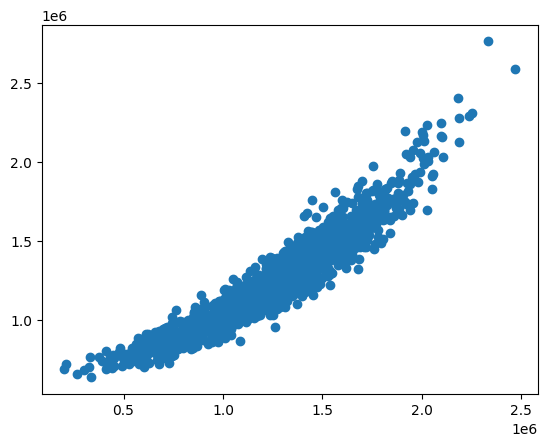

In [76]:
plt.scatter(y_test,s_pred)

# With Adaboost:-

In [77]:
from sklearn.ensemble import AdaBoostRegressor

In [78]:
a_model = AdaBoostRegressor()
a_model.fit(x_train,y_train)
a_model.score(x_train,y_train)

0.8409625477741633

In [79]:
a_model.score(x_test,y_test)

0.806440448232579

In [80]:
a_pred = a_model.predict(x_test)

In [81]:
MSE  = mean_squared_error((y_test),(a_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(a_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (a_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 22842025444.85631
RMSE : 151135.78479253783
R2 : 0.806440448232579
Adjusted R2 :  0.805922563144238


# With Gradient Boosting:-

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

In [212]:
g_model = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,criterion='squared_error',min_samples_split=200,max_depth=3)
g_model.fit(x_train,y_train)
g_model.score(x_train,y_train)

0.9334618849201488

In [213]:
g_model.score(x_test,y_test)

0.9050981582969788

In [85]:
g_pred = g_model.predict(x_test)

In [86]:
MSE  = mean_squared_error((y_test),(g_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(g_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (g_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 11632379708.400053
RMSE : 107853.51041296733
R2 : 0.9014291351797187
Adjusted R2 :  0.9011654004243467


# With XGBoost:-

In [87]:
from xgboost import XGBRegressor

In [88]:
xgb_model= XGBRegressor()
xgb_model.fit(x_train,y_train)
xgb_model.score(x_train,y_train)

0.9793605547294825

In [89]:
xgb_model.score(x_test,y_test)

0.8743432288511563

In [91]:
xgb_pred = xgb_model.predict(x_test)

In [92]:
MSE  = mean_squared_error((y_test),(xgb_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(xgb_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (xgb_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 14828796293.913921
RMSE : 121773.54513158399
R2 : 0.8743432288511563
Adjusted R2 :  0.8740070234434002


In [216]:
xgparam = {'learning_rate':[0.05,0.10,0.15],
          "max_depth":[3,4,5,6,8,10],
          "min_child_weight":[1,3,5,7],
          "colsample_bytree":[0.3,0.4,0.5,0.7]}

In [217]:
xg_grid = GridSearchCV(xgb_model, xgparam, scoring='neg_mean_squared_error', cv=5)
xg_grid.fit(x_train,y_train)
xg_grid.score(x_train,y_train)

-9328216398.195251

In [219]:
xg_grid.score(x_test,y_test)

-10915032934.750221

# At the end of this dataset ML experiment we must say that "Linear Regression" gives higest accuracy "91%".